In [1]:
import pathlib
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro


# Set randomness seeds for reproducability

In [2]:
# Set seed for python's native randomness library
random.seed(2)

# Load Dataset

In [3]:
data_dir = pathlib.Path('DataNoSubstrate')
meta_file = data_dir / 'metadata.csv'

In [4]:
meta_df = pd.read_csv(meta_file, index_col='ID')

In [5]:
meta_df.head()

,OriginDir,OriginName,NewDir,NewName,NShrimp,TankID,Bubbles,Filter,ShrimpPos,Glare
ID,,,,,,,,,,
0,AutoCamRun14,00001044.JPG,DataNoSubstrate,00000001.JPG,5.0,1,NaN,0,(19 100)(78 181)(142 170)(266 52)(297 211),1
1,AutoCamRun14,00001050.JPG,DataNoSubstrate,00000002.JPG,3.0,1,NaN,0,(147 96)(267 6)(179 191),1
2,AutoCamRun14,00000428.JPG,DataNoSubstrate,00000003.JPG,4.0,1,NaN,0,(247 168)(183 196)(60 162)(260 19),0
3,AutoCamRun14,00000400.JPG,DataNoSubstrate,00000004.JPG,2.0,1,NaN,0,(286 63)(12 87),0
4,AutoCamRun14,00000366.JPG,DataNoSubstrate,00000005.JPG,1.0,1,NaN,0,(79 164),0


In [6]:
meta_df.describe()

,NShrimp,TankID,Bubbles,Filter,Glare
count,1097.000000,1097.0,0.0,1097.0,1097.000000
mean,3.750228,1.0,NaN,0.0,0.078396
std,1.548358,0.0,NaN,0.0,0.268916
min,0.000000,1.0,NaN,0.0,0.000000
25%,3.000000,1.0,NaN,0.0,0.000000
50%,4.000000,1.0,NaN,0.0,0.000000
75%,5.000000,1.0,NaN,0.0,0.000000
max,9.000000,1.0,NaN,0.0,1.000000


In [7]:
# Print column names for my convenience
print('\n'.join(meta_df.columns))

OriginDir
OriginName
NewDir
NewName
NShrimp
TankID
Bubbles
Filter
ShrimpPos
Glare


In [8]:
# Load in the image arrays and the number of shrimp in them
img_arrays = []
img_labels = []
for row in meta_df.itertuples():
    # First element in row is the index, so zip with columns
    # starting from the first element.
    index = row[0]
    labeled_row = dict(zip(meta_df.columns, row[1:]))

    # Construct the path to where
    img_path = pathlib.Path(labeled_row['NewDir'],
                            labeled_row['NewName'])

    # load in the image
    img_array = plt.imread(img_path)
    
    # Add the image array and its label to
    # their respective lists
    img_arrays.append(img_array)
    img_labels.append(labeled_row['NShrimp'])
    
    # Display progress bar
    print(f'\r{len(img_arrays)} of {len(meta_df)} loaded', end='')
print()

# Convert img_arrays and img_labels from lists to arrays,
# and normalize RGB values to between 0 and 1.
img_arrays = np.array(img_arrays) / [255, 255, 255]
img_labels = np.array(img_labels)

1097 of 1097 loaded


# View a Couple Images

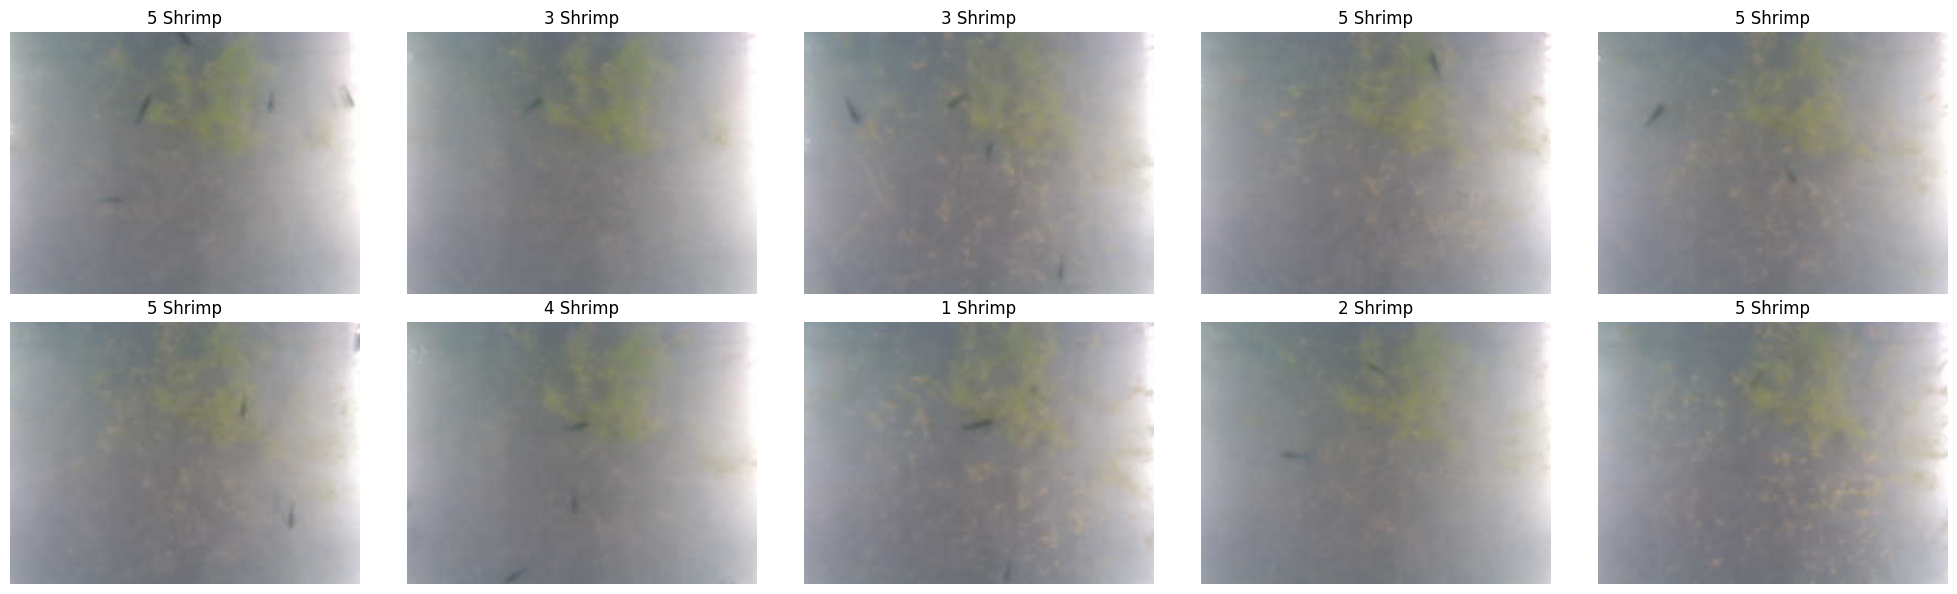

In [9]:
# View 10 random images (always same images due to setting seed)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))
for i in range(10):
    ax_row = i//5
    ax_col = i%5
    img_array = img_arrays[random.randint(0,len(img_arrays))]
    img_label = img_labels[random.randint(0,len(img_arrays))]
    axs[ax_row][ax_col].imshow(img_array)
    axs[ax_row][ax_col].set_title(f'{int(img_label)} Shrimp')
    axs[ax_row][ax_col].axis('off')
fig.tight_layout()
plt.show()


# Test NShrimp Feature for Normality
Actually, I feel like maybe it should be uniformly distributed?

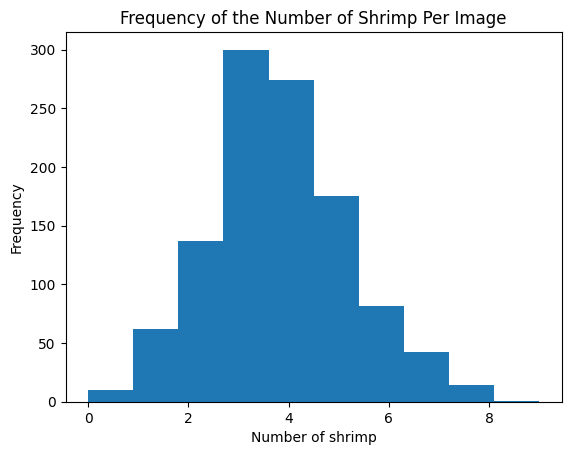

In [10]:
plt.xlabel('Number of shrimp')
plt.ylabel('Frequency')
plt.title('Frequency of the Number of Shrimp Per Image')
plt.hist(img_labels)
plt.show()

In [11]:
# Check descriptive statistics for number of shrimp
print(f'N: {img_labels.size}')
print(f'Mean: {img_labels.mean():.3f}')
print(f'Median: {np.median(img_labels)}')
print(f'Range: {img_labels.min()} to {img_labels.max()}')
print(f'STD: {img_labels.std():.3f}')
standard_error = img_labels.std() / np.sqrt(img_labels.size)
print(f'SE: {standard_error:.3f}')

N: 1097
Mean: 3.750
Median: 4.0
Range: 0.0 to 9.0
STD: 1.548
SE: 0.047


In [12]:
# Print how many images represent each number of shrimp in
# our dataset
for n_shrimp in np.unique(img_labels):
    print(f'{n_shrimp} shrimp: {sum(img_labels == n_shrimp):3} images')

0.0 shrimp:  10 images
1.0 shrimp:  62 images
2.0 shrimp: 137 images
3.0 shrimp: 300 images
4.0 shrimp: 274 images
5.0 shrimp: 175 images
6.0 shrimp:  82 images
7.0 shrimp:  42 images
8.0 shrimp:  14 images
9.0 shrimp:   1 images


In [13]:
# Run Shapiro-Wilk's test for normality
W, p = shapiro(img_labels)
print(f'{W=:.2f}, p-value={p:.2f}')

W=0.96, p-value=0.00


Uhhhh... This means that the data is not normally distributed?? That is... Interesting?
I think we actually would want all values to be uniformly distributed, so equal numbers of images with 0 through n shrimp in them, so not being normally distributed is not an issue in and of itself, but the histogram clearly shows us this is not a uniformly distributed dataset.